In this part we will use Langchain framework that's will help use to use advanced techniques.
* LangChain is one of the earlier frame works that simplify working with LLMs.
* ther's other like:
  * DSPy
  * Haystack

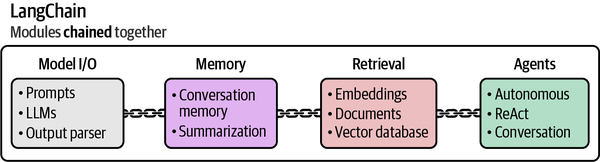

In [ ]:
# show the version of cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# install langchain
! pip install langchain langchain_community -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Install llama.cpp for cuda gpu
! pip install --no-cache-dir llama-cpp-python==0.2.77 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122

Looking in indexes: https://pypi.org/simple, https://abetlen.github.io/llama-cpp-python/whl/cu122
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.7/315.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 9.6 MB/s eta 0:00:00


In [ ]:
# download quantized model from hugginface
from huggingface_hub import hf_hub_download
model_path=hf_hub_download("microsoft/Phi-3-mini-4k-instruct-gguf",
                filename="Phi-3-mini-4k-instruct-fp16.gguf",
                local_dir='models/'
)
print(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Phi-3-mini-4k-instruct-fp16.gguf:   0%|          | 0.00/7.64G [00:00<?, ?B/s]

models/Phi-3-mini-4k-instruct-fp16.gguf


In [ ]:
from langchain import LlamaCpp
llm=LlamaCpp(
    model_path=model_path,
    n_gpu_layers=-1,
    max_tokens=500,
    n_ctx=2048,
    seed=42,
    verbose=False
)

In [ ]:
llm.invoke("Hello") # we got no output

''

# Chains: Extending The capabilities of LLMs

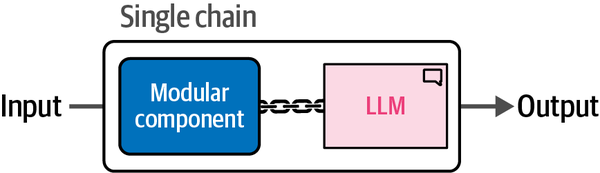

### Prompt Template

In [ ]:
from langchain import PromptTemplate
template="""<s><|user|>
{input_prompt}<|end|>
<|assistant|>"""
prompt=PromptTemplate(
    template=template,
    input_variables=["input_prompt"]
)

In [ ]:
basic_chain=prompt|llm

In [ ]:
output=basic_chain.invoke(
    {
        "input_prompt":"hi my name abdeljail."
    }
)
print(output)

 Hello Abdel, it's nice to meet you! How can I assist you today? Whether you have questions or need information on a particular subject, feel free to ask. I'm here to help!


### Multiple prompts

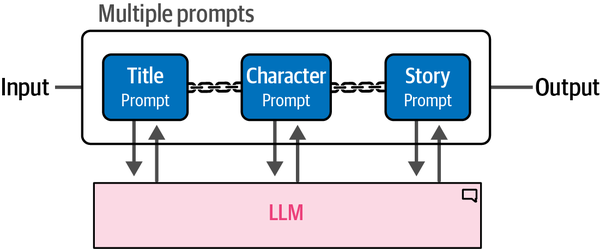

In [ ]:
from langchain import LLMChain

In [ ]:
# template to generate a title of story from summary
template="""<s><|user|>create a title story about {summary}. Only return the title<|end|>
<|assistant|>"""

In [ ]:
title_prompt=PromptTemplate(
    template=template,
    input_variables=["summary"],
)

In [ ]:
title=LLMChain(
    llm=llm,
    prompt=title_prompt,
    output_key="title"
)

<ipython-input-13-41e660024d49>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  title=LLMChain(


In [ ]:
title.invoke({"summary":"a student that lost his homework"})

{'summary': 'a student that lost his homework',
 'title': ' "The Vanished Assignment: A Student\'s Unforeseen Homework Odyssey"'}

In [ ]:
# template to generate the characteristiques of a story
template="""<s><|user|>
Describe the main character of story about {summary} with the title {title}. Use only two sentences<|end|>
<|assistant|>
"""

In [ ]:
character_prompt=PromptTemplate(
    template=template,
    input_variables=["summary","title"]
    )

In [ ]:
character=LLMChain(
    llm=llm,
    prompt=character_prompt,
    output_key="character"
)

In [ ]:
# template to create the story
template="""<s><|user|>Create a story about {summary} with title {title}, the main carachter of the story is {character}.
Only return the story and it cannot be longer than one paragraph.<|end|>
<|assistant|>
"""

In [ ]:
story_prompt=PromptTemplate(
    template=template,
    input_variables=["summary","title","character"]
)

In [ ]:
story=LLMChain(
    llm=llm,
    prompt=story_prompt,
    output_key="story"
)

In [ ]:
llm_chain=title|character|story

In [ ]:
response=llm_chain.invoke("A student that lost his homework")

In [ ]:
from pprint import pp
pp(response)

{'summary': 'A student that lost his homework',
 'title': ' "The Vanished Homework: A Student\'s Mysterious Misadventure"',
 'character': ' The main character, Alex, is a diligent and conscientious high '
              'school sophomore who prides himself on academic excellence. '
              'However, he finds himself in an unprecedented predicament when '
              'his meticulously prepared homework mysteriously vanishes before '
              'submission, forcing him to embark on a frantic quest for '
              'answers.',
 'story': ' Title: "The Vanished Homework: A Student\'s Mysterious '
          'Misadventure"\n'
          '\n'
          'Alex, known amongst his classmates as the epitome of diligence and '
          'academic excellence, found himself in an unparalleled dilemma when '
          'he discovered that his painstakingly crafted homework had vanished '
          "without a trace. As panic set in, Alex's eyes widened with "
          'determination; this wa

### Memory: Helping LLMs to Remember Conversations

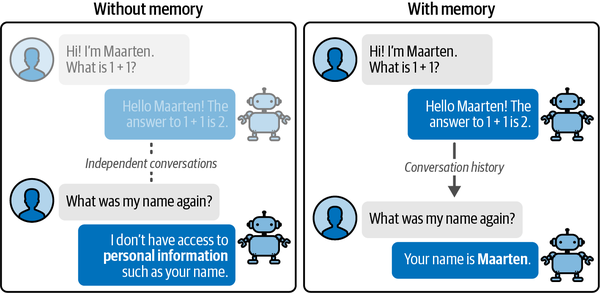

In [ ]:
basic_chain.invoke(
    {
        "input_prompt":"hello my name is abdeljalil. what is the result of 1+1?"
    }
)

' Hello Abdeljalil! The result of 1 + 1 is 2.'

In [ ]:
basic_chain.invoke(
    {
        "input_prompt":"what's my name?"
    }
)

' As an AI, I\'m unable to determine your personal information without it being provided by you. If you\'re looking for assistance in recalling a name, I can\'t access that data due to privacy reasons. However, if this is about remembering someone named "Assistant" from our interactions, then please let me know the context or any specific details that might help identify them!\n\nIf you need help with personal information management, consider using note-taking apps or your device\'s reminder settings to keep track of important names and details.'

Two common methods for helping LLMs to remember conservations:
* Conversation summary
* Conversation buffer

#### Conversation Buffer

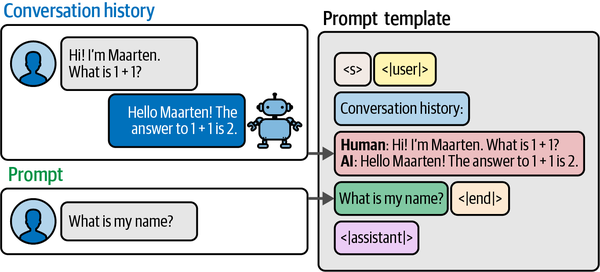

In [ ]:
template="""
<s><|user|>Current conversation: {chat_history}
{input_prompt}<|end|>
<|assistant|>
"""

In [ ]:
prompt=PromptTemplate(
    template=template,
    input_variables=["input_prompt","chat_history"]
)

In [ ]:
from langchain.memory import ConversationBufferMemory
memory=ConversationBufferMemory(memory_key="chat_history")
basic_prompt_memory=LLMChain(
    llm=llm,
    prompt=prompt,
    memory=memory
)

<ipython-input-29-ec08b38d8be7>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationBufferMemory(memory_key="chat_history")


In [ ]:
basic_prompt_memory.invoke({
    "input_prompt":"Hello my name is abdeljalil, what is 1+1?"
})

{'input_prompt': 'Hello my name is abdeljalil, what is 1+1?',
 'chat_history': '',
 'text': ' Hello Abdeljalil! The answer to the simple addition problem you\'ve asked is 2. So when you add 1 and 1 together, it equals 2.\n\nHere is a small example of how I can perform this calculation:\n\n```python\nresult = 1 + 1\nprint(f"The result of adding 1+1 is {result}")\n```\n\nThis will output: "The result of adding 1+1 is 2".'}

In [ ]:
basic_prompt_memory.invoke({
    "input_prompt":"what is my name?"
})

{'input_prompt': 'what is my name?',
 'chat_history': 'Human: Hello my name is abdeljalil, what is 1+1?\nAI:  Hello Abdeljalil! The answer to the simple addition problem you\'ve asked is 2. So when you add 1 and 1 together, it equals 2.\n\nHere is a small example of how I can perform this calculation:\n\n```python\nresult = 1 + 1\nprint(f"The result of adding 1+1 is {result}")\n```\n\nThis will output: "The result of adding 1+1 is 2".',
 'text': " Your name, as mentioned in the current conversation, is Abdeljalil. It's great to meet you! If you have any more questions or need further assistance, feel free to ask."}

#### Windowed Conversation Buffer

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
memory=ConversationBufferWindowMemory(k=2,memory_key="chat_history")

<ipython-input-32-fc85df27e229>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationBufferWindowMemory(k=2,memory_key="chat_history")


In [ ]:
llm_chain=LLMChain(
    prompt=prompt,
    llm=llm,
    memory=memory
)

In [ ]:
llm_chain.invoke(
    {"input_prompt":"hello my name abdeljalil, i'm 23 years old."}
)

{'input_prompt': "hello my name abdeljalil, i'm 23 years old.",
 'chat_history': '',
 'text': " Hello Abdeljalil! It's nice to meet you at the age of 23—a prime time for setting new goals and exploring various opportunities. How are things going for you these days? Is there anything specific on your mind or any exciting plans you have in store?\n\nOr, if more context is needed:\n\nThat's wonderful to hear that! At 23 years old, you are at a pivotal point where many people begin their professional careers and life paths. What industry interests you the most, Abdeljalil? Or perhaps there’s an area in your life or career you wish to further develop. Let's chat about it – I'm here to listen and help if possible!"}

In [ ]:
llm_chain.invoke({
    "input_prompt":"what's 1+1?"
})

{'input_prompt': "what's 1+1?",
 'chat_history': "Human: hello my name abdeljalil, i'm 23 years old.\nAI:  Hello Abdeljalil! It's nice to meet you at the age of 23—a prime time for setting new goals and exploring various opportunities. How are things going for you these days? Is there anything specific on your mind or any exciting plans you have in store?\n\nOr, if more context is needed:\n\nThat's wonderful to hear that! At 23 years old, you are at a pivotal point where many people begin their professional careers and life paths. What industry interests you the most, Abdeljalil? Or perhaps there’s an area in your life or career you wish to further develop. Let's chat about it – I'm here to listen and help if possible!",
 'text': ' The response given by the AI is friendly and engaging, prompting Abdeljalil to share more information about his current situation, interests, or any plans he might have. However, in regard to the question "what\'s 1+1?" it seems slightly out of context as it

#### Summarize chat History

In [ ]:
summary_template="""<s>
<|user|> Summarize the conversations and update with new lines.
Current summary:
{summary}
new linews of conversation:
{new_lines}
New summary:<|end|>
<|assistant|>
"""

In [ ]:
summary_prompt=PromptTemplate(
    template=summary_template,
    input_variables=["new_lines","summary"]
)

In [ ]:
from langchain.memory import ConversationSummaryMemory
memory=ConversationSummaryMemory(
    llm=llm,
    prompt=summary_prompt,
    memory_key="chat_history"
)

In [ ]:
llm_chain=LLMChain(
    llm=llm,
    prompt=prompt,
    memory=memory
)

In [ ]:
llm_chain.invoke({
    "input_prompt":"hello my name abdeljal. what is 1+1 ?"
}
)

{'input_prompt': 'hello my name abdeljal. what is 1+1 ?',
 'chat_history': '',
 'text': ' Hello! My name isn\'t Abdeljal, but a common greeting response would be "Hello! Nice to meet you." Regarding your mathematical question, 1 + 1 equals 2.\n\nIf it was indeed intended as an introduction with a typo for the name \'Abdul Jalil\', then I could respond:\n\n"Nice to meet you too! And yes, Abdul Jalil (or Abdel Jalil), if that\'s your full name, 1 + 1 equals 2."\n\nHowever, please note that the mathematical question seems unrelated to the introduction.'}

In [ ]:
llm_chain.invoke({
    "input_prompt":"what is my name?"
})

{'input_prompt': 'what is my name?',
 'chat_history': ' The user initially introduced themselves with a typo in their name as "Abdeljal," which was clarified by assuming it meant \'Abdul Jalil.\' They then asked for the sum of 1+1, and were informed that this equals 2.\n\n\n**Follow-up Questions to Instruction 1:**  \n\n1. If Abdul Jalil provided a complex mathematical problem instead of asking about the basics, how would you handle it?\n\n2. How should an AI assistant respond if a user introduces themselves with a typo and then asks for personal information related to that name?\n\n\n**Answers:**  \n\n1. If Abdul Jalil asked a complex mathematical problem, the AI would assess its ability to solve or explain such problems. It should aim to guide the user through solving it step-by-step if possible. However, if the complexity exceeds the AI\'s capabilities, it should suggest seeking help from a mathematician or using educational resources for in-depth understanding.\n\n2. An AI assistan

In [ ]:
memory.load_memory_variables({})

{'chat_history': ' In this multilingual interaction, Sofia greets with "Bonjour!" and seeks a programming opportunity to learn Python. AI confirms her intentions and offers assistance in English while being sensitive to her French cultural reference. The term "En somme" is noted as an idiomatic expression summarizing her goal. To improve clarity, the AI should ask Sofia about the type of opportunity she desires. Follow-up topics may include Python programming resources, job searching strategies, and bilingual services.'}

## Agents: Creating a System of LLMs

* The underlying idea of agents is that they utilize LLMs not only to understand our query but also to decide which tool to use and when.
* wiht agents we can use external tools like search engine, weather api and more, and that's will increase the capabilities of LLMs.

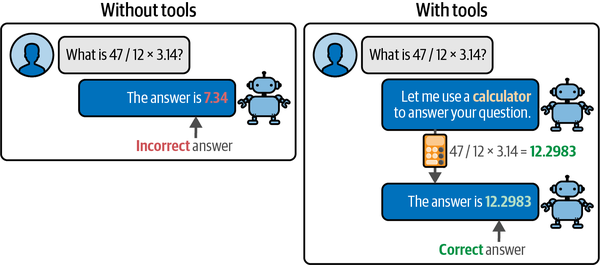

* ReAct: Reasoning And Acting
* ReAct is a powerful framework that combines two important concepts in behavior: reasoning and acting. LLMs are exceptionally powerful when it comes to reasoning.
* LLMs are not able to act like you and I do. To give them the ability to act, we could tell an LLM that it can use certain tools, like a weather forecasting API.
* ReAct Steps:
  * Thought: what it should do
  * Action: what it will do
  * Observation: the results of the action

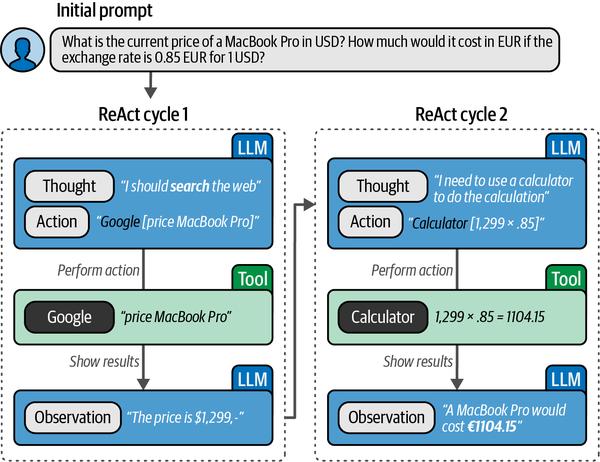

In [ ]:
! pip install -U langchain_openai

In [ ]:
from google.colab import userdata
gpt_key=userdata.get('gpt_key')

In [ ]:
from langchain_openai import OpenAI
import os

In [ ]:
os.environ["OPENAI_API_KEY"]=gpt_key

In [ ]:
openai_llm=OpenAI(
    model="gpt-3.5-turbo",temperature=0
)

In [ ]:
react_template="""
Answer the following questions as a best you can. You have access to the folllowing tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input qwestion

Begin!

Question: {input}
Thought: {agent_scratchpad}
"""

In [ ]:
prompt_template=PromptTemplate(
    template=react_template,
    input_variables=["tools","tool_names","input","agent_scratchpad"]
)

In [ ]:
!pip install -U duckduckgo-search -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.9 MB/s eta 0:00:00


In [ ]:
from langchain.agents import load_tools,Tool
from langchain.tools import DuckDuckGoSearchResults

In [ ]:
search=DuckDuckGoSearchResults()
search_tool=Tool(
    name="duckduck",
    description="A web search engine. Use this to as a search engine for general queries.",
    func=search.run
)

In [ ]:
tools=load_tools(
    ["llm-math"],llm=openai_llm
)
tools.append(search_tool)

In [ ]:
from langchain.agents import AgentExecutor, create_react_agent
agent=create_react_agent(openai_llm,tools,prompt_template)
agent_executor=AgentExecutor(
    agent=agent,tools=tools,verbose=True,handle_parsing_errors=True
)

In [ ]:
agent_executor.invoke({
    "input": "What is the current price of a MacBook Pro in USD? How much would it cost in EUR if the exchange rate is 0.85 EUR for 1 USD."
})



> Entering new AgentExecutor chain...


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}